In [77]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_predict
# Magic function to display plots in the notebook
%matplotlib inline
df = pd.read_csv('teleco_time_series .csv', index_col='Day', parse_dates=True)
df.head()

,Revenue
Day,
1,0.000000
2,0.000793
3,0.825542
4,0.320332
5,1.082554


In [11]:
df.shape

(731, 1)

In [12]:

df.describe()

,Revenue
count,731.000000
mean,9.822901
std,3.852645
min,0.000000
25%,6.872836
50%,10.785571
75%,12.566911
max,18.154769


In [13]:
# Check for null values
null_values = df.isnull().any()

# Check for duplicates
duplicates = df.duplicated().any()

# Print the results
print("Null values:\n", null_values)
print("\nDuplicates:", duplicates)

Null values:
 Revenue    False
dtype: bool

Duplicates: False


In [14]:
# Calculate the number of duplicated rows
num_duplicates = df.duplicated().sum()

# Print the result
print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 0


In [15]:
# Change index name to 'Date' and set new date range starting from January 1st, 2020
df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

# Display the first few rows of the updated DataFrame
df.head()

,Revenue
2020-01-01,0.000000
2020-01-02,0.000793
2020-01-03,0.825542
2020-01-04,0.320332
2020-01-05,1.082554


In [16]:
# Create a copy of the DataFrame
daily1 = df.copy()

In [17]:
# Calculate the mean for the first month (January 2020)
january_mean = daily1['2020-01-01':'2020-01-31'].mean()

# Print the result
print("Mean of daily data for January 2020:\n", january_mean)

Mean of daily data for January 2020:
 Revenue    1.350632
dtype: float64


In [18]:
# Calculate the mean for the first quarter (January to March 2020)
first_quarter_mean = daily1['2020-01-01':'2020-03-31'].mean()

# Print the result
print("Mean of daily data for the first quarter of 2020:\n", first_quarter_mean)

Mean of daily data for the first quarter of 2020:
 Revenue    3.019389
dtype: float64


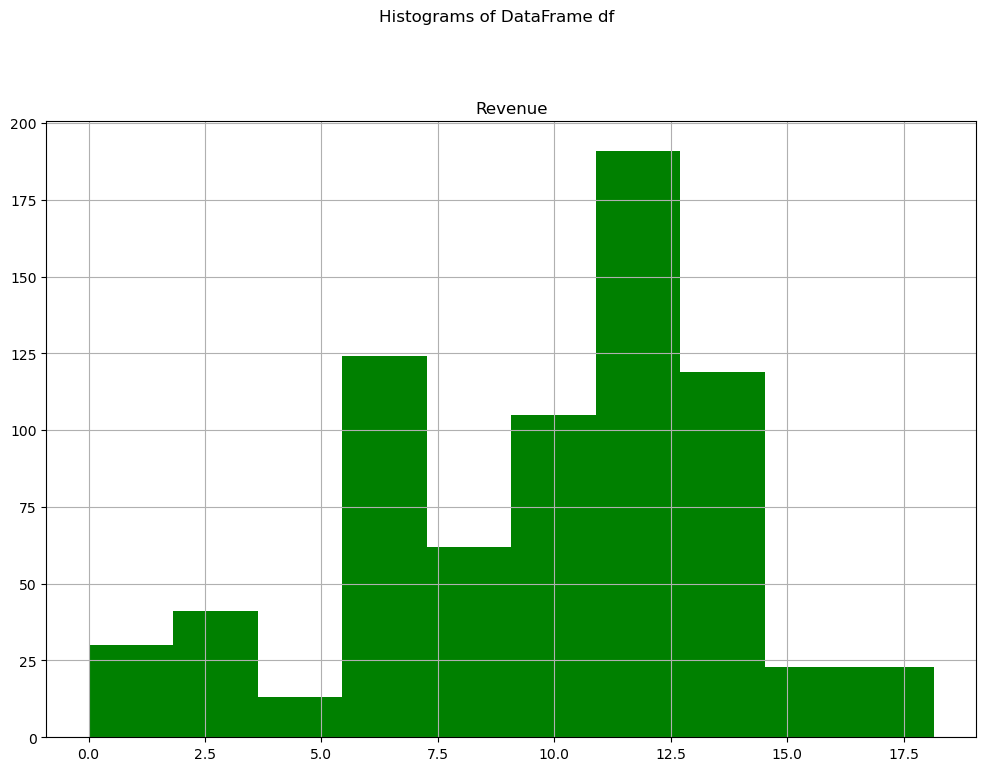

In [23]:
# Create histograms for each column in df and make them green
df.hist(color='green', figsize=(12, 8))
plt.suptitle('Histograms of DataFrame df', y=1.02)  # Add a title above the plots
plt.show()

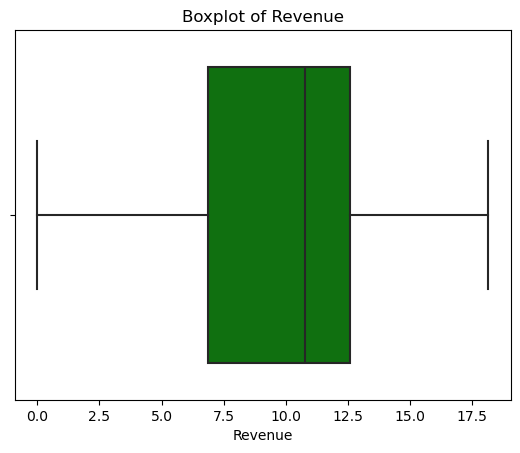

In [24]:

# Create a boxplot to visualize outliers in the 'Revenue' column
sns.boxplot(x=df['Revenue'], color='green')
plt.title('Boxplot of Revenue')
plt.show()

In [25]:
# Identify rows where 'Revenue' is 0
zero_revenue_rows = df[df['Revenue'] == 0]
# Display the rows where 'Revenue' is 0
print(zero_revenue_rows)

            Revenue
2020-01-01      0.0


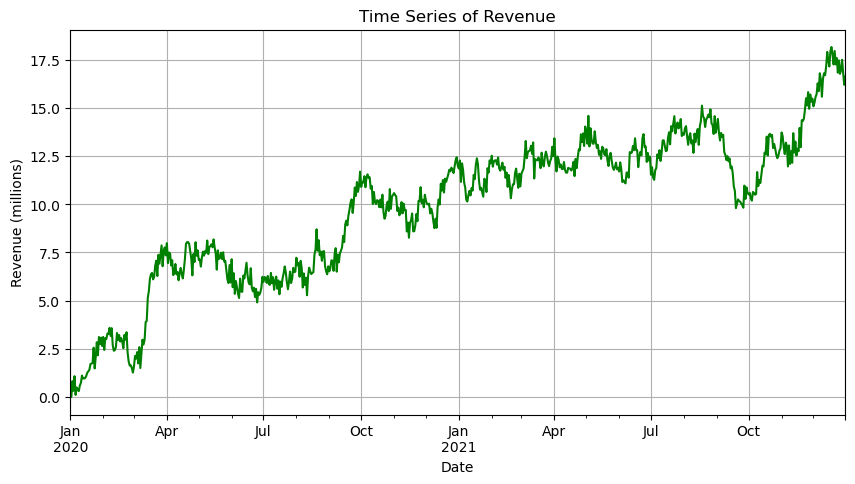

In [26]:
# Plotting the 'Revenue' column as a time series
df['Revenue'].plot(grid=True, figsize=(10, 5), color='green')
# Adding title and labels
plt.title('Time Series of Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (millions)')
# Display the plot
plt.show()

In [27]:
#evaluation imports
#check for stationarity
from statsmodels.tsa.stattools import adfuller
#compare fuller to kpss
from statsmodels.tsa.stattools import kpss
#acf plot
from statsmodels.graphics.tsaplots import plot_acf
#pacf plot
from statsmodels.graphics.tsaplots import plot_pacf
#import warnings filter for readability
import warnings
warnings.filterwarnings('ignore')

In [28]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_kpss(df):
    '''This function takes in a DataFrame and performs Augmented Dickey-Fuller (ADF) and KPSS tests.
    It prints the test statistics, p-values, and critical values, and interprets the results based on predefined cases.'''
    
    # Augmented Dickey-Fuller and KPSS tests
    adf_result = adfuller(df)
    kpss_result = kpss(df)
    
    # Print test results
    print(f'Statistics: Augmented Dickey-Fuller: {adf_result[0]}, KPSS: {kpss_result[0]}')
    print(f'P-values: Augmented Dickey-Fuller: {adf_result[1]}, KPSS: {kpss_result[1]}')
    print(f'Critical Values:\nAugmented Dickey-Fuller: {adf_result[4]}, KPSS: {kpss_result[3]}\n')
    
    # Case statements to interpret results
    if (adf_result[1] < 0.05) & (kpss_result[1] > 0.05):
        print('Case 2: ADF rejects H0, KPSS does not reject H0. Series is stationary according to ADF.')
    elif (adf_result[1] > 0.05) & (kpss_result[1] < 0.05):
        print('Case 1: ADF does not reject H0, KPSS rejects H0. Series has a unit root according to KPSS.')
    elif (adf_result[1] > 0.05) & (kpss_result[1] > 0.05):
        print('Case 3: Both tests do not reject H0. Insufficient evidence for stationarity/unit root.')
    else:
        print('Case 4: Both tests reject H0. Series is not stationary and has a unit root.')

In [29]:
# Function definition
def adf_kpss(df):
    '''This function takes in a DataFrame and performs Augmented Dickey-Fuller (ADF) and KPSS tests.
    It prints the test statistics, p-values, and critical values, and interprets the results based on predefined cases.'''
    
    # Augmented Dickey-Fuller and KPSS tests
    adf_result = adfuller(df)
    kpss_result = kpss(df)
    
    # Print test results
    print(f'Statistics: Augmented Dickey-Fuller: {adf_result[0]}, KPSS: {kpss_result[0]}')
    print(f'P-values: Augmented Dickey-Fuller: {adf_result[1]}, KPSS: {kpss_result[1]}')
    print(f'Critical Values:\nAugmented Dickey-Fuller: {adf_result[4]}, KPSS: {kpss_result[3]}\n')
    
    # Case statements to interpret results
    if (adf_result[1] < 0.05) & (kpss_result[1] > 0.05):
        print('Case 2: ADF rejects H0, KPSS does not reject H0. Series is stationary according to ADF.')
    elif (adf_result[1] > 0.05) & (kpss_result[1] < 0.05):
        print('Case 1: ADF does not reject H0, KPSS rejects H0. Series has a unit root according to KPSS.')
    elif (adf_result[1] > 0.05) & (kpss_result[1] > 0.05):
        print('Case 3: Both tests do not reject H0. Insufficient evidence for stationarity/unit root.')
    else:
        print('Case 4: Both tests reject H0. Series is not stationary and has a unit root.')

# Applying the function to your 'daily1' DataFrame
adf_kpss(daily1)

Statistics: Augmented Dickey-Fuller: -1.9246121573101826, KPSS: 3.5607139300692454
P-values: Augmented Dickey-Fuller: 0.3205728150793969, KPSS: 0.01
Critical Values:
Augmented Dickey-Fuller: {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}, KPSS: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Case 1: ADF does not reject H0, KPSS rejects H0. Series has a unit root according to KPSS.


In [30]:
# Make data stationary via differencing
daily1_diff = daily1.diff()
daily1_diff.dropna(inplace=True)  # Drop NaN values created by differencing
# Apply adf_kpss function to analyze stationarity
adf_kpss(daily1_diff)

Statistics: Augmented Dickey-Fuller: -44.87452719387599, KPSS: 0.0667878999007167
P-values: Augmented Dickey-Fuller: 0.0, KPSS: 0.1
Critical Values:
Augmented Dickey-Fuller: {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}, KPSS: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Case 2: ADF rejects H0, KPSS does not reject H0. Series is stationary according to ADF.


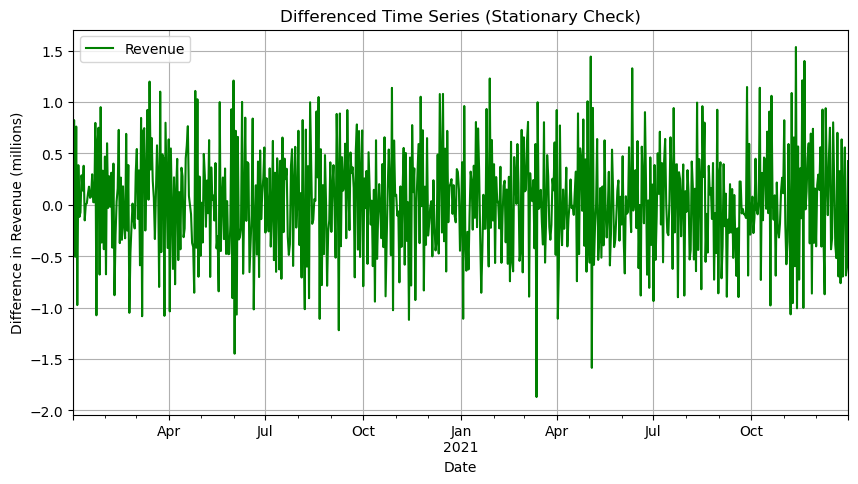

In [31]:
# Plotting the differenced data to visually verify stationarity
daily1_diff.plot(grid=True, figsize=(10, 5), color='green')  # Adjust color as per your preference
# Adding title and labels
plt.title('Differenced Time Series (Stationary Check)')
plt.xlabel('Date')
plt.ylabel('Difference in Revenue (millions)')
# Display the plot
plt.show()

In [32]:
# Save differenced data to CSV
daily1_diff.to_csv('daily1_diff.csv')

In [35]:
# Train-test split for daily1
daily1train = daily1.loc[:'2021-08-08']
daily1test = daily1.loc['2021-08-09':]

In [36]:
# Train-test split for daily1_diff
daily1diftrain = daily1_diff.loc[:'2021-08-08']
daily1diftest = daily1_diff.loc['2021-08-09':]

In [37]:
# Verify train-test split for daily1
print(len(daily1test) + len(daily1train) == len(daily1))
# Verify train-test split for daily1_diff
print(len(daily1diftest) + len(daily1diftrain) == len(daily1_diff))

True
True


In [38]:
# Save train and test datasets to CSV files
daily1train.to_csv('daily1train.csv')
daily1test.to_csv('daily1test.csv')
daily1diftrain.to_csv('daily1diftrain.csv')
daily1diftest.to_csv('daily1diftest.csv')

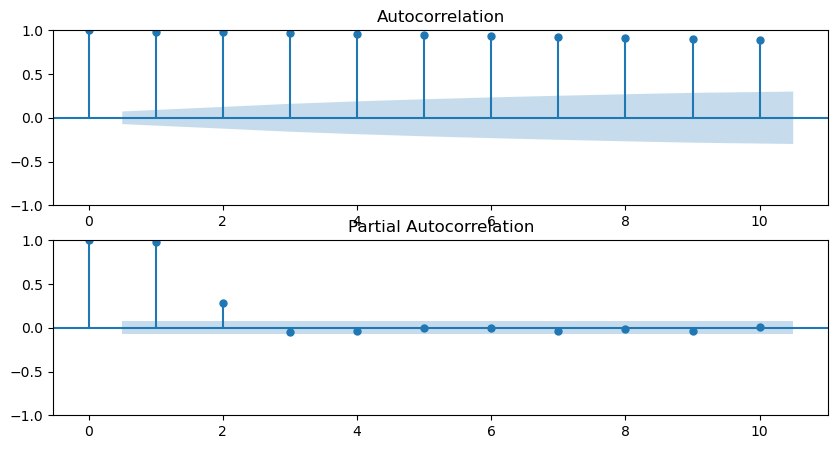

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
# Create subplots for ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
# Plot ACF
plot_acf(daily1, lags=10, ax=ax[0])
# Plot PACF
plot_pacf(daily1, lags=10, ax=ax[1])
# Display the plots
plt.show()

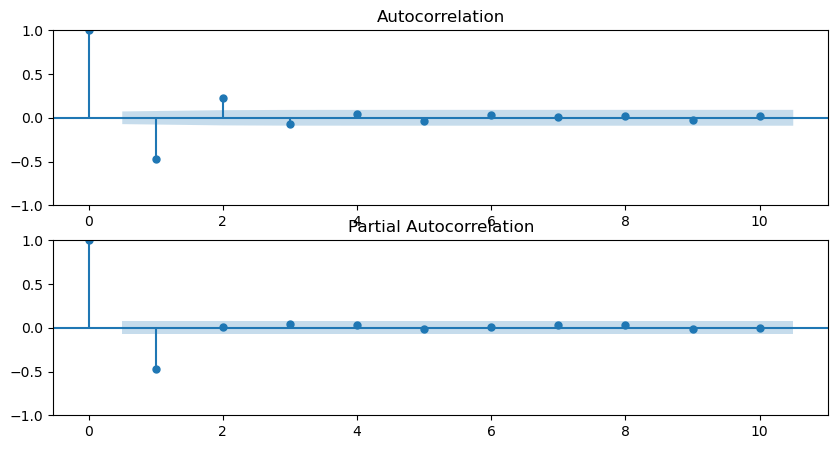

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
# Create subplots for ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
# Plot ACF for daily1_diff
plot_acf(daily1_diff, lags=10, ax=ax[0])
# Plot PACF for daily1_diff
plot_pacf(daily1_diff, lags=10, ax=ax[1])
# Display the plots
plt.show()

In [41]:
# Calculate autocorrelation for 'Revenue' in daily1_diff (differenced data)
autocorr_diff = daily1_diff['Revenue'].autocorr()
# Calculate autocorrelation for 'Revenue' in daily1 (original data)
autocorr_original = daily1['Revenue'].autocorr()
# Print results
print(f'Autocorrelation for differenced data: {autocorr_diff}')
print(f'Autocorrelation for original data: {autocorr_original}')

Autocorrelation for differenced data: -0.4696890672062501
Autocorrelation for original data: 0.9902917999411424


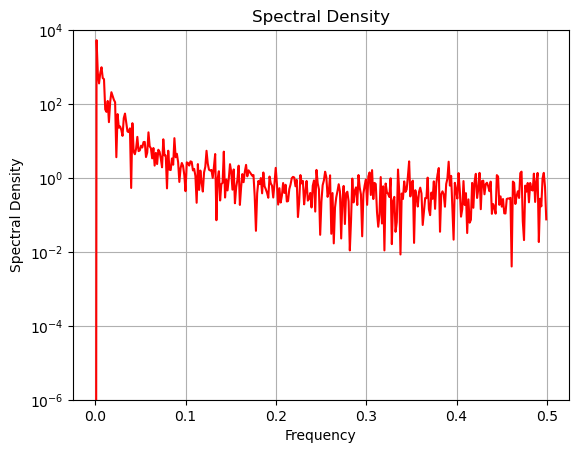

In [46]:
from scipy import signal
import matplotlib.pyplot as plt
# Compute the power spectral density using periodogram
f, Pxx_den = signal.periodogram(daily1['Revenue'])
# Plot the spectral density in red
plt.semilogy(f, Pxx_den, color='red')
plt.ylim([1e-6, 1e4])  # Set y-axis limits for better visualization
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.grid(True)
plt.show()

In [47]:
# Calculate mean and standard deviation for daily1 DataFrame
mean_daily1 = daily1.mean()
std_daily1 = daily1.std()
# Print results
print(f"Mean of daily1:\n{mean_daily1}")
print(f"\nStandard deviation of daily1:\n{std_daily1}")

Mean of daily1:
Revenue    9.822901
dtype: float64

Standard deviation of daily1:
Revenue    3.852645
dtype: float64


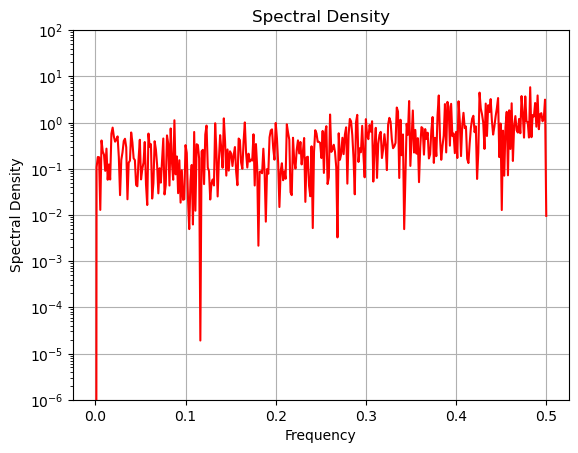

In [49]:
# Compute the power spectral density using periodogram for daily1_diff['Revenue']
f, Pxx_den = signal.periodogram(daily1_diff['Revenue'])
# Plot the spectral density
plt.semilogy(f, Pxx_den,color='red')
plt.ylim([1e-6, 1e2])  # Set y-axis limits for better visualization
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.grid(True)
plt.show()

In [50]:
# Calculate mean and standard deviation for daily1_diff DataFrame
mean_daily1_diff = daily1_diff.mean()
std_daily1_diff = daily1_diff.std()
# Print results
print(f"Mean of daily1_diff:\n{mean_daily1_diff}")
print(f"\nStandard deviation of daily1_diff:\n{std_daily1_diff}")

Mean of daily1_diff:
Revenue    0.022768
dtype: float64

Standard deviation of daily1_diff:
Revenue    0.535507
dtype: float64


In [51]:

#import seasonal_decompose and decomp_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [88]:

# Decompose daily1 data
daily1_decomp = seasonal_decompose(daily1)
# Extract components
daily1_trend = daily1_decomp.trend
daily1_seasonal = daily1_decomp.seasonal
daily1_residual = daily1_decomp.resid
# Display decomposition results
daily1_decomp

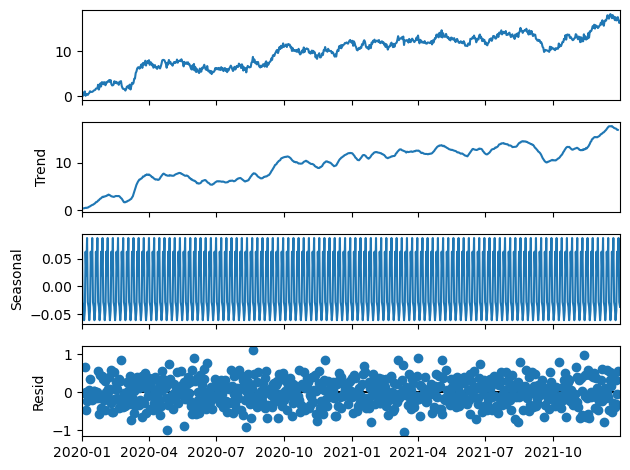

In [87]:

# Decompose daily1 data
daily1_decomp = seasonal_decompose(daily1)
# Plot the decomposed components
daily1_decomp.plot()
plt.show()

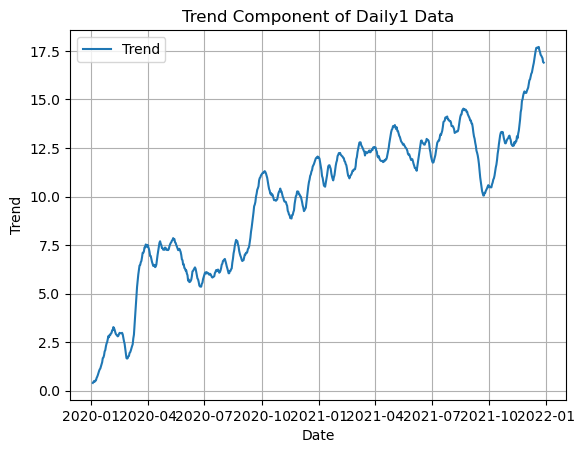

In [56]:

# Assuming daily1_trend is defined from your seasonal decomposition
plt.plot(daily1_trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component of Daily1 Data')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)
plt.show()

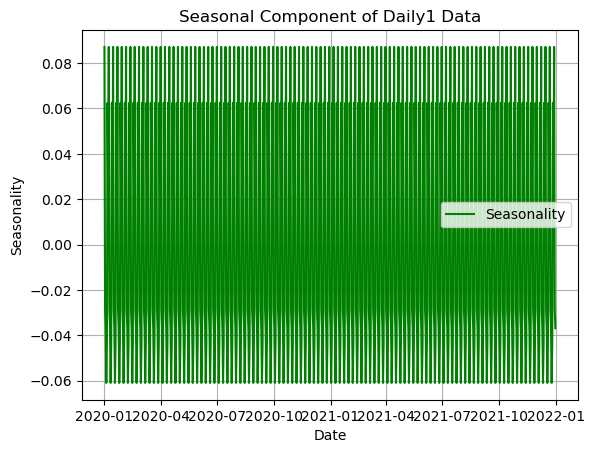

In [58]:
import matplotlib.pyplot as plt
# Assuming daily1_seasonal is defined from your seasonal decomposition
plt.plot(daily1_seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.title('Seasonal Component of Daily1 Data')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.grid(True)
plt.show()

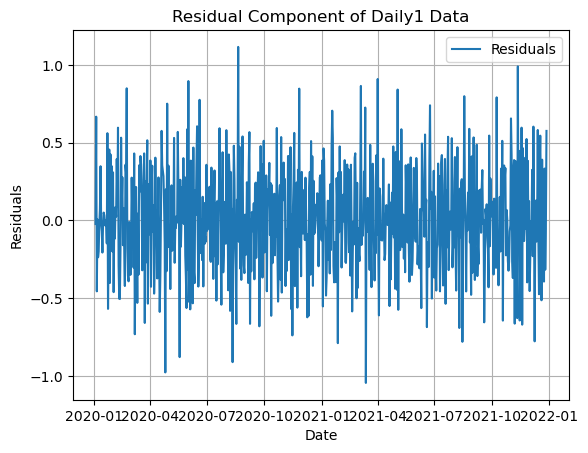

In [59]:

# Assuming daily1_residual is defined from your seasonal decomposition
plt.plot(daily1_residual, label='Residuals')
plt.legend(loc='best')
plt.title('Residual Component of Daily1 Data')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [60]:
# Decompose monthly data (daily1_diff) with an additive model
diff_decomp = seasonal_decompose(daily1_diff, model='additive')
# Extract components
difftrend = diff_decomp.trend
diffseasonal = diff_decomp.seasonal
diffresidual = diff_decomp.resid

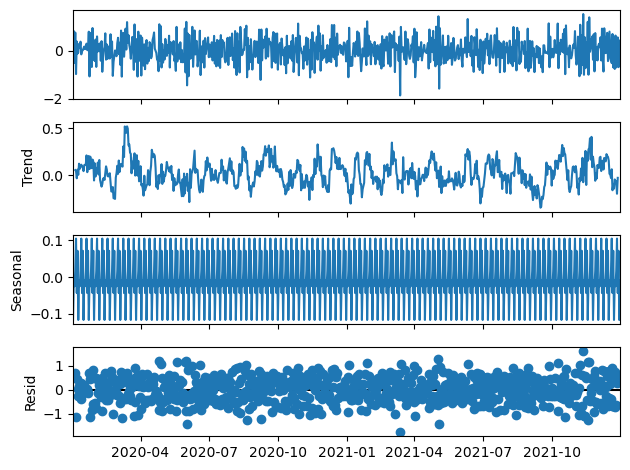

In [61]:
diff_decomp.plot()
plt.show()

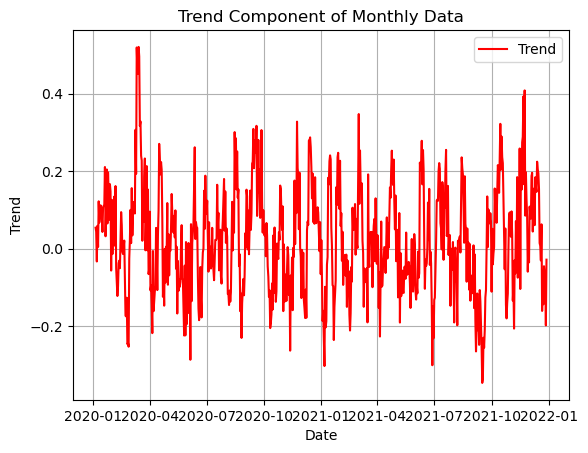

In [63]:

# Assuming difftrend is defined from your seasonal decomposition
plt.plot(difftrend, label='Trend', color='red')
plt.legend(loc='best')
plt.title('Trend Component of Monthly Data')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)
plt.show()

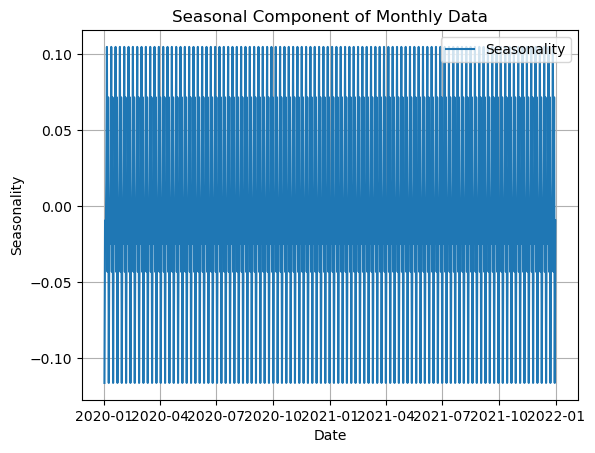

In [64]:
# Assuming diffseasonal is defined from your seasonal decomposition
plt.plot(diffseasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonal Component of Monthly Data')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.grid(True)
plt.show()

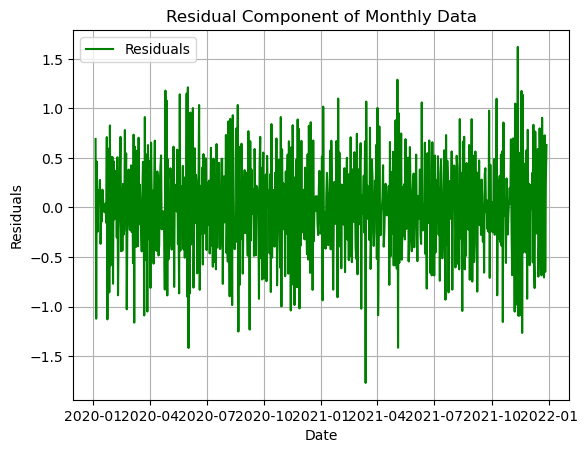

In [65]:
# Assuming diffresidual is defined from your seasonal decomposition
plt.plot(diffresidual, label='Residuals', color='green')
plt.legend(loc='best')
plt.title('Residual Component of Monthly Data')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [67]:
 !pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   --- ------------------------------------ 51.2/614.7 kB 1.3 MB/s eta 0:00:01
   -------------------------------------- - 593.9/614.7 kB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------ --------------------------------- 0.5/2.8 MB 15.2 MB/s eta 0:00:01
   ---------------- ----------------------- 1.2/2.8 MB 14.7 MB/s eta 0:00:01
   ---------------------------- ----------- 2.0/2.8 MB 15.8 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 17.8 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 16.2 MB/s eta 0:00:00


In [68]:
from pmdarima import auto_arima
auto_arima(daily1train, 
           start_p=2, d=None, start_q=2, max_p=6, max_d=3, max_q=6,
           start_P=1, D=None, start_Q=1, max_P=3, max_D=2, max_Q=3, m=7,
           seasonal=True, stationary=False, information_criterion='aic',
           alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True,
           suppress_warnings=True, error_action='ignore', trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=912.455, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=777.146, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=802.713, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=911.523, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=775.277, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=777.146, Time=0.16 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=779.146, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=777.262, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=777.265, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=800.798, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=779.077, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[7]             : AIC=776.233, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[7] intercept
Total fit time: 2.390 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 7),
      suppress_warnings=True)

In [69]:

auto_arima(daily1diftrain, 
           seasonal=True, m=10,
           d=1, trace=True, stationary=True,
           error_action='ignore', suppress_warnings=True,
           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[10] intercept   : AIC=782.533, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[10] intercept   : AIC=912.455, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[10] intercept   : AIC=777.131, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[10] intercept   : AIC=802.644, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[10]             : AIC=911.523, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[10] intercept   : AIC=775.277, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[10] intercept   : AIC=777.121, Time=0.12 sec
 ARIMA(1,0,0)(1,0,1)[10] intercept   : AIC=778.376, Time=0.35 sec
 ARIMA(2,0,0)(0,0,0)[10] intercept   : AIC=777.262, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[10] intercept   : AIC=777.265, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[10] intercept   : AIC=800.798, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[10] intercept   : AIC=779.077, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[10]             : AIC=776.233, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[10] intercept
Total fit time: 1.796 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 10),
      suppress_warnings=True)

In [70]:
# Non-seasonal ARIMA model
daily1mod = sm.tsa.ARIMA(daily1train, order=(1, 1, 0))
# Seasonal ARIMA model (assuming daily data with weekly seasonality)
daily1mod_seasonal = sm.tsa.ARIMA(daily1train, order=(1, 1, 0), seasonal_order=(0, 0, 0, 7))

In [71]:
# Non-seasonal ARIMA model for differenced data
daily1difmod = sm.tsa.ARIMA(daily1diftrain, order=(1, 0, 0))

In [72]:
daily1results = daily1mod.fit()
difresults = daily1difmod.fit()

In [73]:
#summary results
print(daily1results.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  586
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -386.116
Date:                Sun, 14 Jul 2024   AIC                            776.233
Time:                        17:59:50   BIC                            784.976
Sample:                    01-01-2020   HQIC                           779.640
                         - 08-08-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4573      0.036    -12.621      0.000      -0.528      -0.386
sigma2         0.2191      0.014     15.967      0.000       0.192       0.246
Ljung-Box (L1) (Q):                   0.02   Jarque-

In [74]:
print(difresults.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  585
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -384.638
Date:                Sun, 14 Jul 2024   AIC                            775.277
Time:                        18:00:05   BIC                            788.392
Sample:                    01-02-2020   HQIC                           780.388
                         - 08-08-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0228      0.013      1.717      0.086      -0.003       0.049
ar.L1         -0.4601      0.036    -12.665      0.000      -0.531      -0.389
sigma2         0.2180      0.014     16.032      0.0

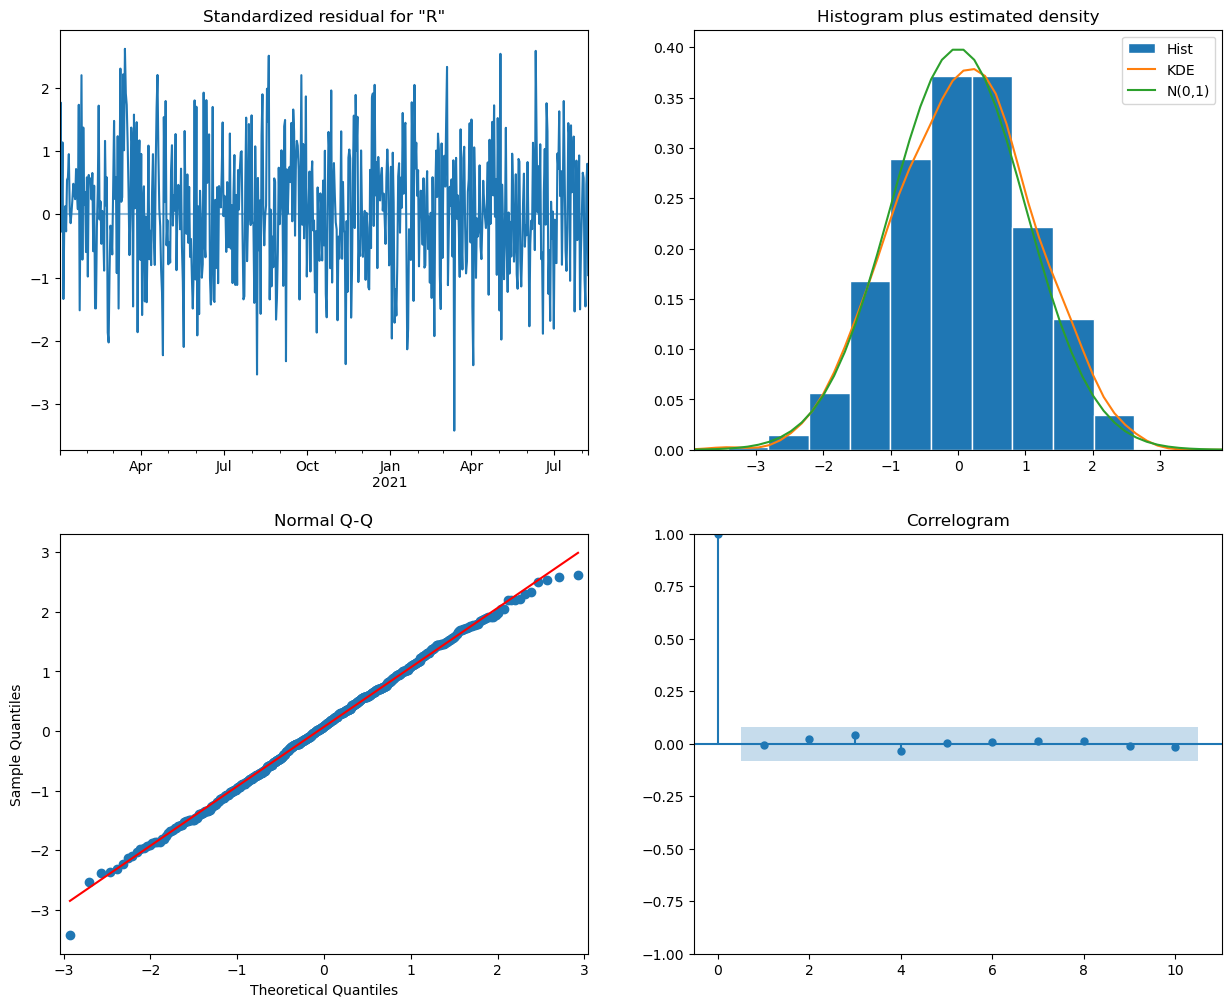

In [75]:
daily1results.plot_diagnostics(figsize=(15, 12))
plt.show()

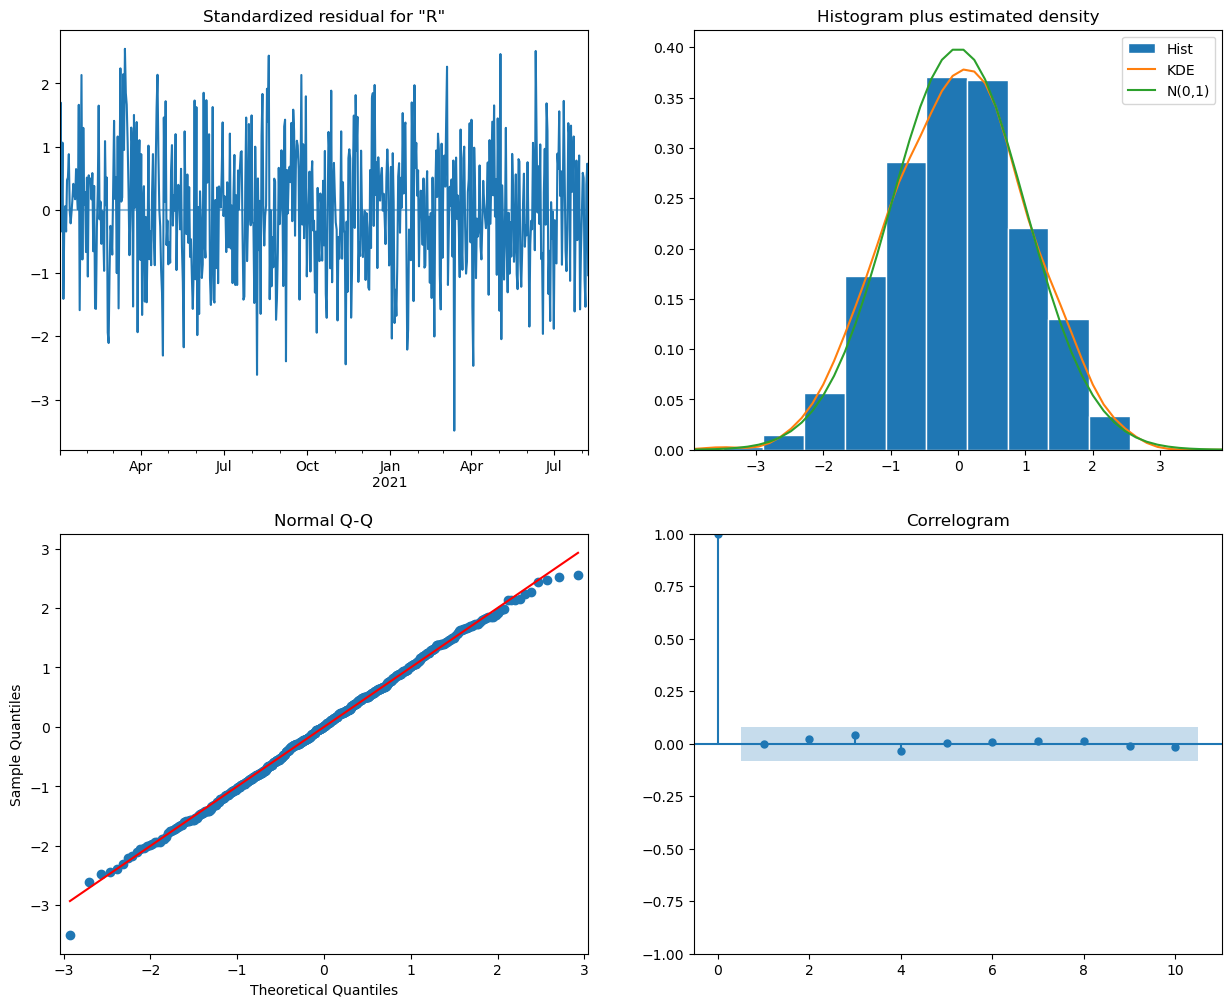

In [76]:
difresults.plot_diagnostics(figsize=(15, 12))
plt.show()

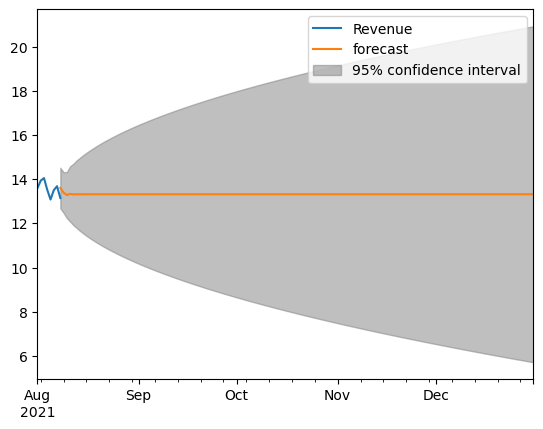

In [79]:
fig, ax = plt.subplots()
daily1train.loc['2021-08-01':].plot(ax=ax)
plot_predict(daily1results, start='2021-08-08', end='2021-12-31', ax=ax)
plt.show()

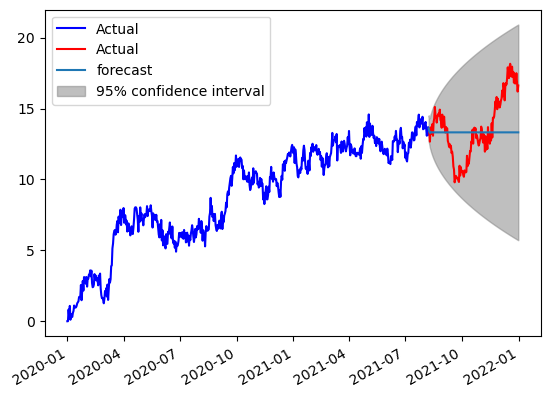

In [81]:
fig, ax = plt.subplots()
plt.plot(daily1train, label='Actual', color='blue')
plt.plot(daily1test, label='Actual', color='red')
plot_predict(daily1results, start='2021-08-08', end='2021-12-31', ax=ax)
plt.show()

In [83]:

# Define and fit SARIMA model
model_sar = sm.tsa.SARIMAX(daily1train['Revenue'], order=(1, 0, 3))
sar_results = model_sar.fit()
# Display summary of SARIMA model
print(sar_results.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  586
Model:               SARIMAX(1, 0, 3)   Log Likelihood                -388.587
Date:                Sun, 14 Jul 2024   AIC                            787.175
Time:                        18:03:44   BIC                            809.042
Sample:                    01-01-2020   HQIC                           795.696
                         - 08-08-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994      0.001   1022.084      0.000       0.997       1.001
ma.L1         -0.4567      0.040    -11.321      0.000      -0.536      -0.378
ma.L2          0.2380      0.044      5.452      0.0

In [84]:
# Forecast using SARIMA model
sar_pred = sar_results.predict(start=585, end=730, typ='levels').rename('Predictions')

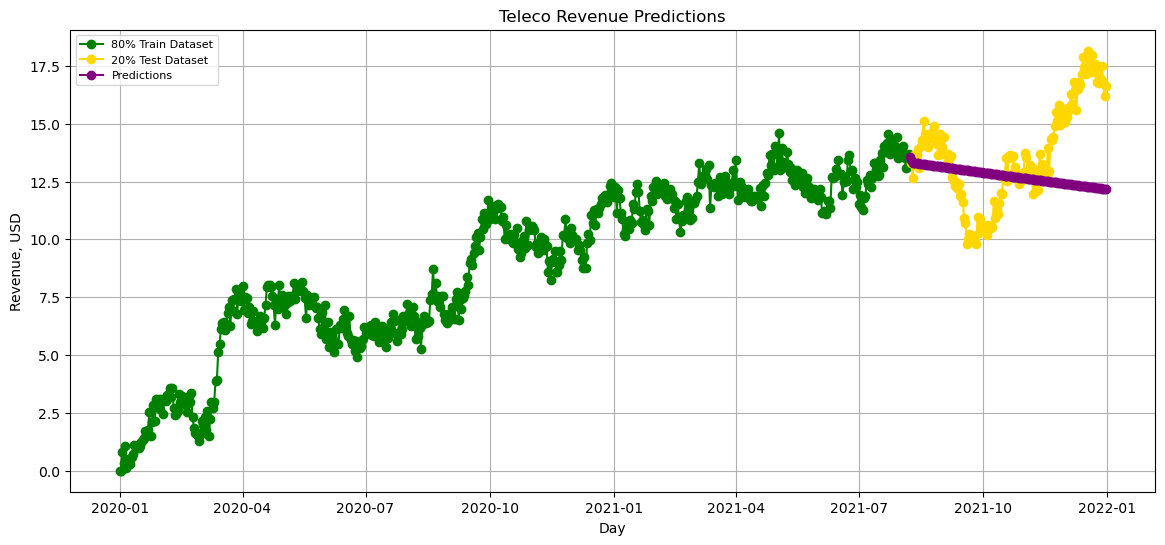

In [85]:

plt.figure(figsize=(14, 6))
plt.plot(daily1train['Revenue'], 'o-', color='green', label='80% Train Dataset')
plt.plot(daily1test['Revenue'], 'o-', color='gold', label='20% Test Dataset')
plt.plot(sar_pred, 'o-', color='purple', label='Predictions')
plt.title('Teleco Revenue Predictions')
plt.xlabel('Day')
plt.ylabel('Revenue, USD')
plt.legend(loc='best', fontsize=8)
plt.grid(True)
plt.show()

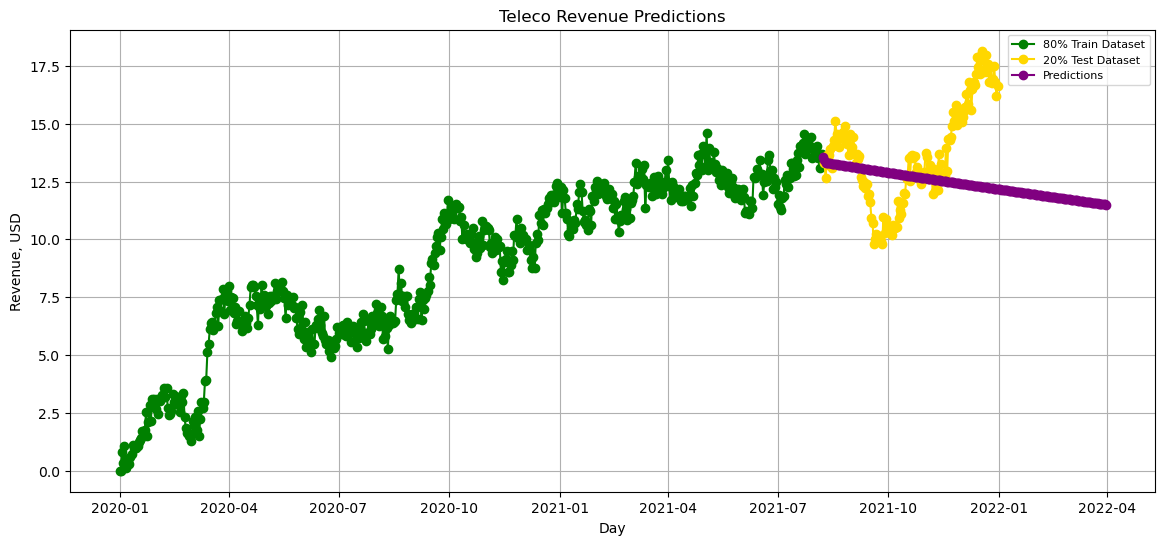

In [86]:
# Forecast using SARIMA model
sar_pred = sar_results.predict(start=585, end=820, typ='levels').rename('Predictions')
# Plotting
plt.figure(figsize=(14, 6))
plt.plot(daily1train['Revenue'], 'o-', color='green', label='80% Train Dataset')
plt.plot(daily1test['Revenue'], 'o-', color='gold', label='20% Test Dataset')
plt.plot(sar_pred.index, sar_pred.values, 'o-', color='purple', label='Predictions')
plt.title('Teleco Revenue Predictions')
plt.xlabel('Day')
plt.ylabel('Revenue, USD')
plt.legend(loc='best', fontsize=8)
plt.grid(True)
plt.show()